In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import folium
from IPython.display import display
import plotly.express as px

In [2]:
#load ev station csv
ev_stations_to_load = Path("Resources/ev_stations_v1.csv")

In [3]:
#read csv
ev_stations = pd.read_csv(ev_stations_to_load)
ev_stations

/var/folders/0h/lqy3k6gn3dnf1vwn1ct91kc80000gn/T/ipykernel_18583/1680406485.py:2: DtypeWarning: Columns (6,20) have mixed types. Specify dtype option on import or set low_memory=False.
  ev_stations = pd.read_csv(ev_stations_to_load)


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50284,ELEC,VIP LOT STATION1,1501 Kirkwood Meadows Dr,NaN,Markleeville,CA,96120,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50285,ELEC,Prunedale Shopping Center,8065 San Miguel Canyon Rd,NaN,Salinas,CA,93907,NaN,877-455-3833,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50286,ELEC,Beaverton Electric Avenue,11665 SW Beaverton Hillsdale Hwy,NaN,Beaverton,OR,97005,NaN,855-900-7584,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50287,ELEC,Shell - Inman,2040 Highway 292,NaN,Inman,SC,29349,NaN,855-900-7584,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#pull only columns of interest
cleaned_df = ev_stations[["Station Name", "Street Address", "City", "State",
                         "ZIP", "Groups With Access Code", "Access Days Time", 
                         "Latitude", "Longitude", "EV Pricing"]]


In [5]:
#drop na's
cleaned_df_2 = cleaned_df.dropna(how='any')
cleaned_df_2

,Station Name,Street Address,City,State,ZIP,Groups With Access Code,Access Days Time,Latitude,Longitude,EV Pricing
10,California Air Resources Board,9530 Telstar Ave,El Monte,CA,91731,Public,24 hours daily,34.068720,-118.064000,Free
12,Scripps Green Hospital,10666 N Torrey Pines Rd,La Jolla,CA,92037,Public,24 hours daily,32.899470,-117.243000,Pay to Park
13,Galpin Motors,15421 Roscoe Blvd,Sepulveda,CA,91343,Public - Call ahead,Dealership business hours,34.221665,-118.468371,Free
14,Galleria at Tyler,1299 Galleria at Tyler,Riverside,CA,92503,Public,6am-12am daily,33.909914,-117.459053,Free
15,City of Pasadena - Holly Street Garage,150 E Holly St,Pasadena,CA,91103,Public,24 hours daily; pay lot,34.147620,-118.147111,Free
...,...,...,...,...,...,...,...,...,...,...
50237,Bill Clough Ford,227 US-13,Windsor,NC,27983,Public,MON: 24 hours | TUE: 24 hours | WED: 24 hours ...,36.001416,-76.962169,Level 2: $0.49 per kWh
50238,Ford - Jerseyville Motor Company,1205 S State St,Jerseyville,IL,62052,Public,MON: 24 hours | TUE: 24 hours | WED: 24 hours ...,39.106184,-90.315512,Level 2: $0.49 per kWh
50239,One/Two Irvington Center,702 King Farm Blvd.,Rockville,MD,20850,Public,MO: 12:00am-12:00am; TU: 12:00am-12:00am; WE: ...,39.110866,-77.177882,$1.00-$10.00/Hr Variable Parking Fee
50240,600 New Hampshire Ave,600 New Hampshire Avenue Northwest,Washington,DC,20037,Public,MO: Not Specified; TU: Not Specified; WE: Not ...,38.897843,-77.054991,$2.00/Hr Parking Fee


In [6]:
#filter down to free, public and 24 hours daily
final_charging_df= cleaned_df_2.loc[(cleaned_df_2['EV Pricing'] == 'Free') & 
                                    (cleaned_df_2['Groups With Access Code'] == 'Public')&
                                    (cleaned_df_2['Access Days Time'] == '24 hours daily')]

final_charging_df

,Station Name,Street Address,City,State,ZIP,Groups With Access Code,Access Days Time,Latitude,Longitude,EV Pricing
10,California Air Resources Board,9530 Telstar Ave,El Monte,CA,91731,Public,24 hours daily,34.068720,-118.064000,Free
29,City of Santa Monica - Airport,3223 Donald Douglas Loop,Santa Monica,CA,90405,Public,24 hours daily,34.017081,-118.447040,Free
33,Van Nuys Amtrak/Metrolink Station,7724 Van Nuys Blvd,Van Nuys,CA,91405,Public,24 hours daily,34.211080,-118.448704,Free
34,Office Max - Home Depot,7075 Firestone Blvd,Downey,CA,90241,Public,24 hours daily,33.947560,-118.153806,Free
48,Sylmar Metrolink Station,Village Way Dr,San Fernando,CA,91342,Public,24 hours daily,34.292413,-118.449791,Free
...,...,...,...,...,...,...,...,...,...,...
49840,Holiday Inn Express Hotel & Suites,2407 Neva Rd,Antigo,WI,54409,Public,24 hours daily,45.165529,-89.145651,Free
49892,Middle Georgia State University - Cochran,1100 SE 2nd St,Cochran,GA,31014,Public,24 hours daily,32.380615,-83.346060,Free
49951,Watchung Municipal Building,15 Mountain Blvd,Watchung,NJ,7069,Public,24 hours daily,40.636798,-74.451783,Free
49952,Gateway Oaks Metro Center,2710 Gateway Oaks Dr,Sacramento,CA,95833,Public,24 hours daily,38.615468,-121.517263,Free


In [7]:
#save to new csv
final_charging_df.to_csv('Cleaned_data/cleaned_ev_stations.csv', index=False)

In [8]:
#use folium to pull in stations of interest and plot on map
charging_map = folium.Map(location=[39.8,-98.6],tiles='OpenStreetMap', zoom_start=4)

for i in range(0,len(final_charging_df)):
       folium.Marker(
          location=[final_charging_df.iloc[i]['Latitude'], final_charging_df.iloc[i]['Longitude']],
          popup=final_charging_df.iloc[i]['Station Name']).add_to(charging_map)

# for i, row in ev_charging_data.iterrows():
#     Marker(location=[row['Latitude'], row['Longitude']],
#            popup=row['Street Address']).add_to(charging_map)


charging_map.save('charging_map.html') 
display(charging_map)

In [9]:
#load gas prices csv
gas_prices_to_load = Path("Resources/gas_prices.csv")

In [10]:
#read csv and change index
gas_prices = pd.read_csv(gas_prices_to_load)
gas_prices.set_index('Year')

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2000,1.301,1.369,1.541,1.506,1.498,1.617,1.593,1.510,1.582,1.559,1.555,1.489
2001,1.472,1.484,1.447,1.564,1.729,1.640,1.482,1.427,1.531,1.362,1.263,1.131
2002,1.139,1.130,1.241,1.407,1.421,1.404,1.412,1.423,1.422,1.449,1.448,1.394
2003,1.473,1.641,1.748,1.659,1.542,1.514,1.524,1.628,1.728,1.603,1.535,1.494
2004,1.592,1.672,1.766,1.833,2.009,2.041,1.939,1.898,1.891,2.029,2.010,1.882
2005,1.823,1.918,2.065,2.283,2.216,2.176,2.316,2.506,2.927,2.785,2.343,2.186
2006,2.315,2.310,2.401,2.757,2.947,2.917,2.999,2.985,2.589,2.272,2.241,2.334
2007,2.274,2.285,2.592,2.860,3.130,3.052,2.961,2.782,2.789,2.793,3.069,3.020
2008,3.047,3.033,3.258,3.441,3.764,4.065,4.090,3.786,3.698,3.173,2.151,1.689


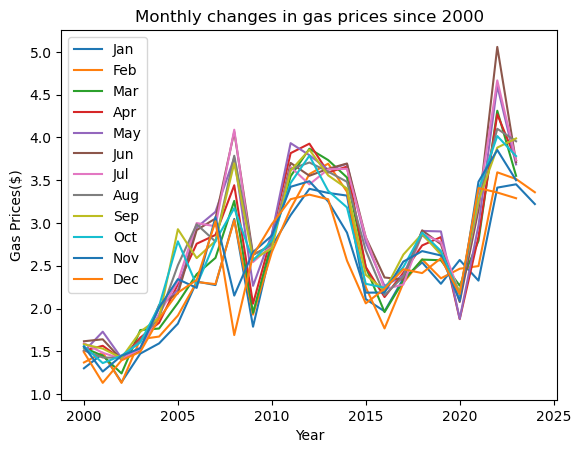

In [11]:
#plot gas prices over the years and save fig
gas_prices.plot(x='Year')
plt.ylabel("Gas Prices($)")
plt.title("Monthly changes in gas prices since 2000")
plt.savefig('Images/gas_prices.png')
plt.show()

In [12]:
#load ev_sales csv 
ev_sales_to_load = Path("Resources/ev_historical_sales.csv")

In [13]:
#read csv
ev_sales = pd.read_csv(ev_sales_to_load)

In [14]:
#show only columns of interest
ev_sales_cleaned = ev_sales[["region", "powertrain","year", "value"]]

In [15]:
#save cleaned csv
ev_sales_cleaned.to_csv("Cleaned_data/ev_sales.csv", index=False)

In [16]:
#set index and clean to show only results for USA
historical_ev_final = ev_sales_cleaned.loc[(ev_sales_cleaned['region'] == 'USA')].set_index('year')
historical_ev_final

,region,powertrain,value
year,,,
2010,USA,BEV,1200
2011,USA,BEV,9800
2011,USA,PHEV,8000
2012,USA,PHEV,39000
2012,USA,BEV,15000
2013,USA,BEV,48000
2013,USA,PHEV,49000
2014,USA,PHEV,55000
2014,USA,BEV,63000


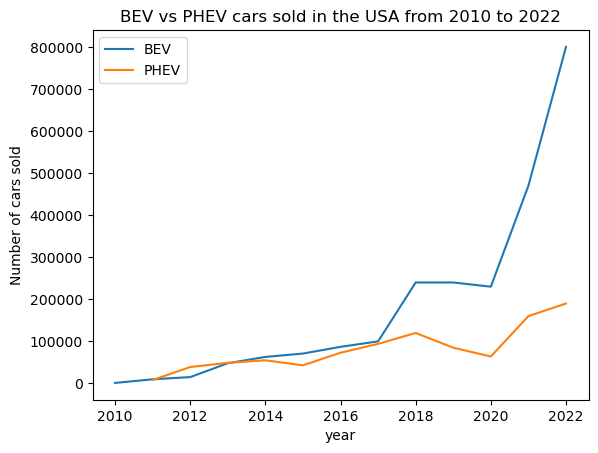

In [17]:
#plot and save fig
historical_ev_final.groupby('powertrain')['value'].plot(legend="true")
plt.ylabel('Number of cars sold')
plt.title('BEV vs PHEV cars sold in the USA from 2010 to 2022')
plt.savefig('Images/ev_sales.png')
plt.show()


In [18]:
#load csv
sales_compared_to_load = Path("Resources/car_sales_compared.csv")

In [19]:
#read_csv
all_sales = pd.read_csv(sales_compared_to_load)

In [20]:
#
all_sales_final= all_sales.loc[(all_sales['Entity'] == 'United States')]
all_sales_final

,Entity,Code,Year,Electric cars sold,Non-electric car sales
365,United States,USA,2011,17800,10452788.0
366,United States,USA,2012,54000,13116732.0
367,United States,USA,2013,97000,13011108.0
368,United States,USA,2014,118000,13140427.0
369,United States,USA,2015,114000,14501385.0
370,United States,USA,2016,160000,15840000.0
371,United States,USA,2017,194000,15972666.0
372,United States,USA,2018,360000,17640000.0
373,United States,USA,2019,325000,15151191.0
374,United States,USA,2020,294000,13069636.0


In [21]:
all_sales_final.to_csv('Cleaned_data/all_sales_final.csv', index=False)

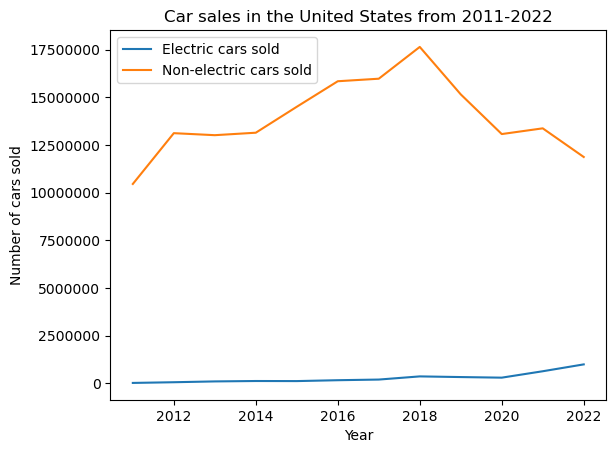

In [22]:
plt.plot(all_sales_final['Year'], all_sales_final['Electric cars sold'], label = 'Electric cars sold')
plt.plot(all_sales_final['Year'], all_sales_final['Non-electric car sales'], label = 'Non-electric cars sold')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of cars sold')
plt.title('Car sales in the United States from 2011-2022')
ax= plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.savefig('Images/all_car_sales.png')
plt.show()

In [23]:
prices_to_load = Path('Resources/ev_prices.csv')

In [24]:
prices_df = pd.read_csv(prices_to_load)

In [25]:
prices_df["Price in US$"] = prices_df["Price.DE."] / 0.93 
prices_df["Range mph"] = prices_df["Range"] * 0.6213711922
prices_df["Top Speed mph"] = prices_df["Top_speed"] * 0.6213711922
prices_df.round(2)

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.,Price in US$,Range mph,Top Speed mph
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0,63459.14,270.30,134.84
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1,49698.92,260.98,124.90
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3,47983.87,205.05,99.42
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9,43000.00,223.69,99.42
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4,59376.34,313.79,124.90
...,...,...,...,...,...,...,...,...,...,...,...,...
355,46.3,Citroen e-Jumpy Combi XL 50 kWh,https://ev-database.org/car/1596/Citroen-e-Jum...,257,290.0,52730.0,180,130,12.1,56698.92,111.85,80.78
356,46.3,Fiat E-Ulysse L2 50 kWh,https://ev-database.org/car/1721/Fiat-E-Ulysse...,250,290.0,55990.0,185,130,12.1,60204.30,114.95,80.78
357,46.3,Opel Vivaro-e Combi L 50 kWh,https://ev-database.org/car/1601/Opel-Vivaro-e...,257,290.0,51825.0,180,130,12.1,55725.81,111.85,80.78
358,68.0,Opel Zafira-e Life M 75 kWh,https://ev-database.org/car/1348/Opel-Zafira-e...,257,290.0,69250.0,265,130,13.3,74462.37,164.66,80.78


In [26]:
cleaned_prices_df = prices_df[["Car_name", "Price in US$", "Range mph", "Top Speed mph"]]
final_cleaned = cleaned_prices_df.dropna(how='any').round(2)
final_cleaned

,Car_name,Price in US$,Range mph,Top Speed mph
0,Tesla Model Y Long Range Dual Motor,63459.14,270.30,134.84
1,Tesla Model 3,49698.92,260.98,124.90
2,BYD ATTO 3,47983.87,205.05,99.42
3,MG MG4 Electric 64 kWh,43000.00,223.69,99.42
4,Tesla Model 3 Long Range Dual Motor,59376.34,313.79,124.90
...,...,...,...,...
355,Citroen e-Jumpy Combi XL 50 kWh,56698.92,111.85,80.78
356,Fiat E-Ulysse L2 50 kWh,60204.30,114.95,80.78
357,Opel Vivaro-e Combi L 50 kWh,55725.81,111.85,80.78
358,Opel Zafira-e Life M 75 kWh,74462.37,164.66,80.78


In [29]:
fig = px.scatter(final_cleaned,x='Car_name', y="Price in US$", color = 'Price in US$',
                custom_data=['Range mph', 'Top Speed mph'])
fig.update_traces(
    hovertemplate="<br>".join([
        "Car_name: %{x}",
        "Price : %{y:2f}",
        "Range (mph): %{customdata[0]}",
        "Top Speed (mph): %{customdata[1]}",
        
    ])
)
fig.write_html("ev_prices.html")
fig.show()
